In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [186]:
df=pd.read_csv("weight-height.csv") 


In [187]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [188]:
df.shape

(10000, 3)

In [189]:
df["Height"]=df["Height"]*2.54
df["Weight"]=df["Weight"]/2.205

df["Weight"]=df["Weight"].astype('int64')
df["Height"]=df["Height"].astype('int64')

array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>]], dtype=object)

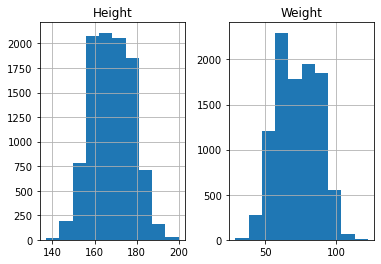

In [190]:
df.hist()

In [191]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.073300,72.720200
std,9.775269,14.570111
min,137.000000,29.000000
25%,161.000000,61.000000
50%,168.000000,73.000000
75%,175.000000,84.000000
max,200.000000,122.000000


<AxesSubplot:xlabel='Gender', ylabel='Height'>

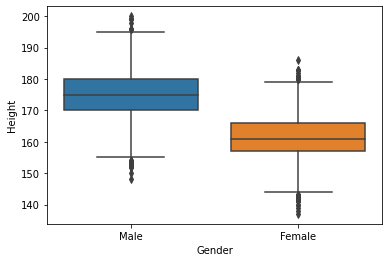

In [192]:
sns.boxplot(x=df["Gender"],y=df["Height"])

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

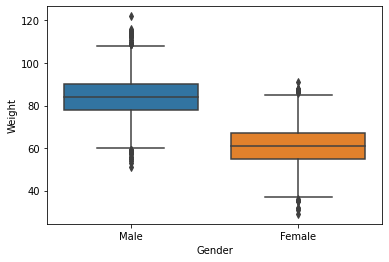

In [193]:
sns.boxplot(x=df["Gender"],y=df["Weight"])

In [194]:
#job_id'leri modele string olarak vermektense (0,1,2,3...) gibi numaralandırmak daha faydalı olacaktır.
from sklearn.preprocessing import LabelEncoder 
#modeli oluşturduktan sonra hiç görmediği veri üstünde test edebilmek için veriyi test ve train bölümlerine ayırmak için kullanılacak.
from sklearn.model_selection import train_test_split 
#modeli oluşturduktan sonra doğruluğunu ölçmek için modelin tahmin ettiği değerlerle, gerçek değerleri kıyas edip bize skor verecek.
from sklearn.metrics import accuracy_score

In [195]:
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Gender"]) 
df.head()
df["Label"].value_counts()

1    5000
0    5000
Name: Label, dtype: int64

In [196]:
categories = list(label_encoder.inverse_transform([0, 1]))
categories

['Female', 'Male']

In [197]:
classes = list(set(df.Gender)) #job isimlerini burada tutuyoruz ki görselleştirme sırasında kullanalım.
df.drop(["Gender"], axis=1, inplace=True)


In [198]:
X,y=df.iloc[:,0:2],df.iloc[:,-1] #X-> Height,Weight y->Label(gender)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [200]:
from sklearn.tree import DecisionTreeClassifier #karar ağacı

clf = DecisionTreeClassifier(max_depth=3,random_state=42) 
clf.fit(X_train, y_train)

print("Accuracy of train:", clf.score(X_train, y_train))
print("Accuracy of test:", clf.score(X_test, y_test))

Accuracy of train: 0.9126666666666666
Accuracy of test: 0.914


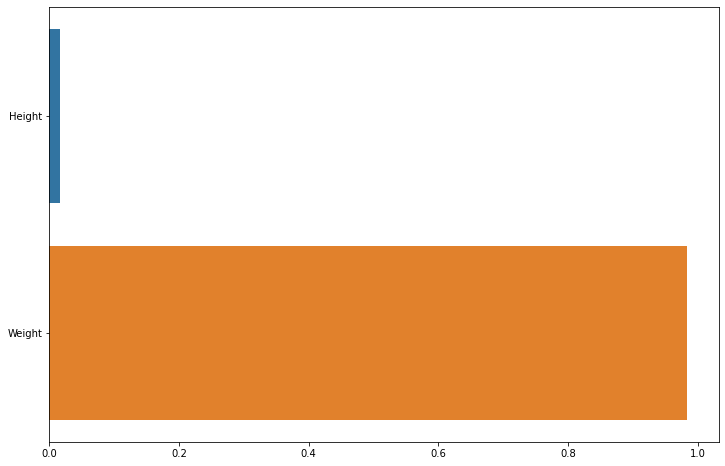

In [201]:
import seaborn as sns
plt.figure(figsize=(12, 8))

importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [202]:

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1258
           1       0.90      0.93      0.91      1242

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



[Text(775.0, 660.625, 'Weight <= 73.5\ngini = 0.5\nsamples = 7500\nvalue = [3742, 3758]\nclass = Male'),
 Text(387.5, 471.875, 'Weight <= 68.5\ngini = 0.19\nsamples = 3875\nvalue = [3462, 413]\nclass = Female'),
 Text(193.75, 283.125, 'Weight <= 62.5\ngini = 0.088\nsamples = 3136\nvalue = [2991, 145]\nclass = Female'),
 Text(96.875, 94.375, 'gini = 0.027\nsamples = 2132\nvalue = [2103, 29]\nclass = Female'),
 Text(290.625, 94.375, 'gini = 0.204\nsamples = 1004\nvalue = [888, 116]\nclass = Female'),
 Text(581.25, 283.125, 'Height <= 166.5\ngini = 0.462\nsamples = 739\nvalue = [471, 268]\nclass = Female'),
 Text(484.375, 94.375, 'gini = 0.498\nsamples = 307\nvalue = [145, 162]\nclass = Male'),
 Text(678.125, 94.375, 'gini = 0.37\nsamples = 432\nvalue = [326, 106]\nclass = Female'),
 Text(1162.5, 471.875, 'Weight <= 76.5\ngini = 0.143\nsamples = 3625\nvalue = [280, 3345]\nclass = Male'),
 Text(968.75, 283.125, 'Height <= 172.5\ngini = 0.438\nsamples = 436\nvalue = [141, 295]\nclass = Male

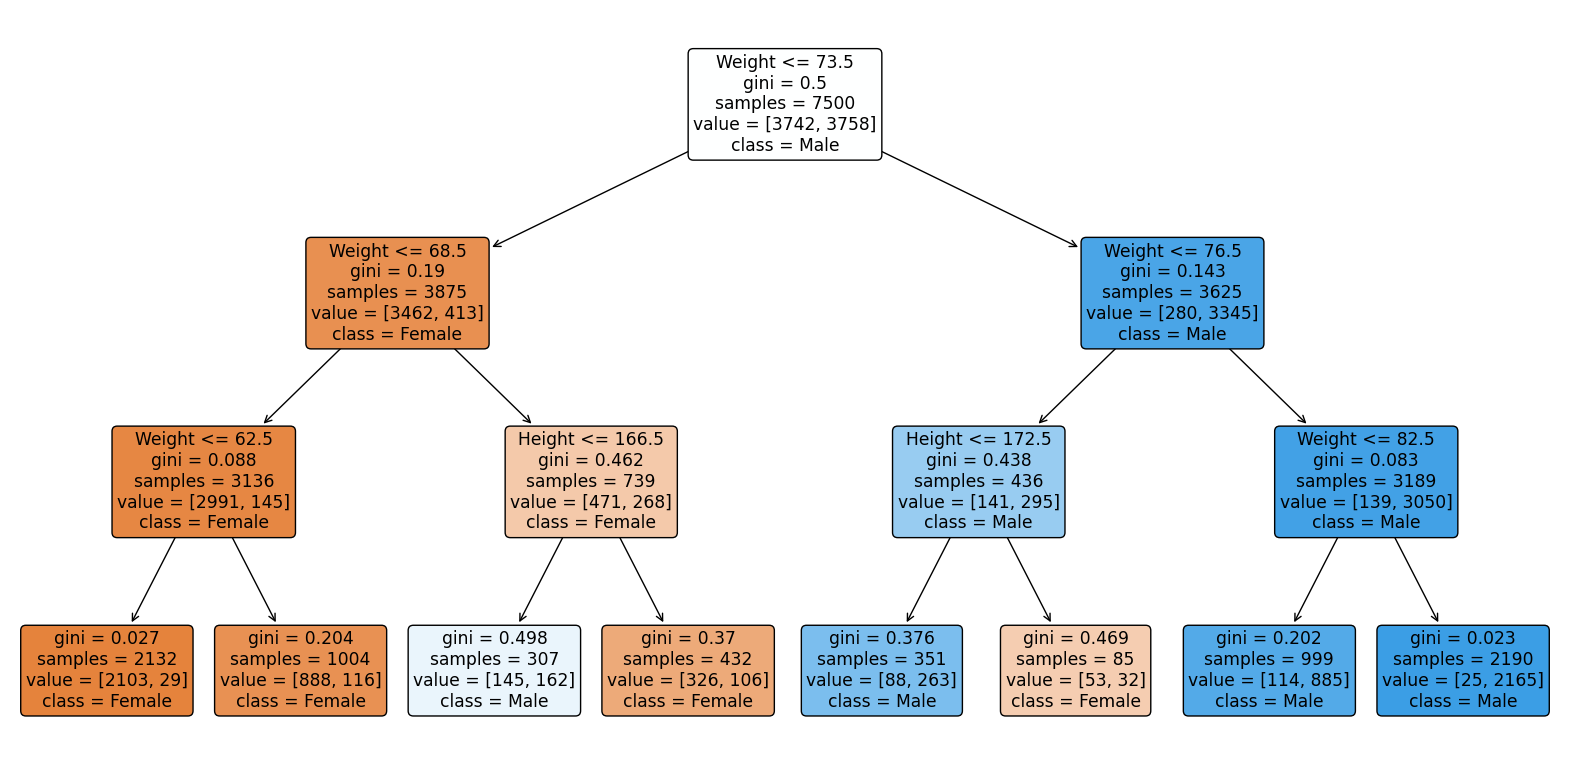

In [203]:
from sklearn import tree
plt.figure(figsize=(20,10),dpi=100)
tree.plot_tree(clf,feature_names=["Height","Weight"],rounded=True,filled=True,class_names=["Female","Male"],impurity=True)